In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('Datasets/X_Train With Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('Datasets/X_Test With Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('Datasets/Y_Train With Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('Datasets/Y_Test With Yeo Johnson 70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train With Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test With Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train With Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test With Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Forward Feature Selection
## Sequential Feature Selection using Logistic Regression

In [6]:
# #importing the necessary libraries
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LogisticRegression
# # Sequential Forward Selection(sfs)
# sfs = SFS(LogisticRegression(),
#           k_features=9,
#           forward=True,
#           floating=False,
#           scoring = 'r2',
#           cv = 0)

# sfs.fit(x_train, y_train)
# sfs.k_feature_names_     # to get the final set of features

In [7]:
SFS_Top_4_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_train = SFS_Top_4_X

In [8]:
SFS_Top_4_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_test = SFS_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.925
[[29  3  0]
 [ 2  9  0]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.69      0.82      0.75        11
           2       1.00      0.97      0.99        37

    accuracy                           0.93        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.93      0.93      0.93        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9318858560794044
f1 Score  0.927543351815612
Recall  0.925
Specificity/TNR: 0.90625
Cohen Kappa: 0.8779557589626239
AUC Score  0.9923273152722881


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.925,
  0.9318858560794044,
  0.925,
  0.927543351815612,
  0.8779557589626239,
  0.9923273152722881]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02413502, 0.01515899, 0.02702711, 0.01974621, 0.0199465 ,
        0.01306503, 0.01815085, 0.02184196, 0.03031807, 0.01984625,
        0.02014565, 0.02004566, 0.02413497, 0.01476002, 0.02022586,
        0.02253933, 0.02912126, 0.01745291, 0.01874979, 0.02573051,
        0.02902231, 0.015958  , 0.03430803, 0.01745291, 0.02343757,
        0.01535861, 0.01765351, 0.01565762, 0.02094357, 0.01406171,
        0.01595645, 0.01815104, 0.02632892, 0.01326411, 0.01386187,
        0.01835043, 0.02114308, 0.01266527, 0.01775205, 0.01825101,
        0.01755188, 0.01256516, 0.0408896 , 0.01615665, 0.0167547 ,
        0.01416113, 0.01635551, 0.01436107, 0.01974666, 0.0127656 ,
        0.01476052, 0.0168546 , 0.02134261, 0.01346321, 0.01445997,
        0.01815112, 0.02224019, 0.01515913, 0.02014554, 0.02333705,
        0.0197463 , 0.02343795, 0.06143425, 0.0154583 , 0.02054398,
        0.01635578, 0.02114336, 0.01545773, 0.0216419 , 0.01575766,
        0.01605663, 0.02044475,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024135,0.005349,0.004987,0.004088,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,0.947368,...,0.894737,0.722222,0.722222,0.888889,0.944444,1.000000,0.833333,0.895322,0.100899,112
1,0.015159,0.004588,0.003691,0.002187,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.947368,...,1.000000,0.777778,0.888889,0.944444,0.944444,1.000000,0.833333,0.928363,0.070640,86
2,0.027027,0.004645,0.004488,0.004330,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.947368,0.736842,...,0.947368,0.777778,0.833333,0.888889,0.777778,0.888889,0.777778,0.857602,0.085228,147
3,0.019746,0.003302,0.002993,0.000631,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.684211,0.894737,...,0.789474,0.777778,0.611111,0.722222,0.444444,0.611111,0.722222,0.699415,0.116481,275
4,0.019947,0.002360,0.002893,0.000299,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.842105,0.722222,0.722222,0.777778,0.777778,0.833333,0.722222,0.792398,0.051730,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.014262,0.001342,0.002693,0.000779,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.842105,0.842105,...,0.789474,0.722222,0.666667,0.666667,0.666667,0.833333,0.722222,0.759357,0.074467,250
396,0.019148,0.002985,0.003092,0.000698,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.526316,0.555556,0.555556,0.500000,0.500000,0.500000,0.500000,0.505848,0.029327,295
397,0.016656,0.004185,0.001796,0.000599,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",1.000000,0.947368,...,1.000000,0.833333,0.888889,0.944444,0.944444,1.000000,0.833333,0.939181,0.063131,11
398,0.013164,0.002435,0.002793,0.000598,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,299


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.895322
1,1,linear,0.928363
2,1,poly,0.857602
3,1,sigmoid,0.699415
4,1,rbf,0.792398
...,...,...,...
395,20,sigmoid,0.759357
396,20,rbf,0.505848
397,20,linear,0.939181
398,20,poly,0.495029


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9447368421052632
{'C': 12, 'gamma': 1, 'kernel': 'linear'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      1.00      0.96        11
           2       1.00      0.97      0.99        37

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9885416666666667
f1 Score  0.9876861226920786
Recall  0.9875
Specificity/TNR: 1.0
Cohen Kappa: 0.9795501022494888
AUC Score  1.0


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9447368421052632,
  0.9885416666666667,
  0.9875,
  0.9876861226920786,
  0.9795501022494888,
  1.0]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.870
Testing Accuracy: 0.938
[[32  0  0]
 [ 2  6  3]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.55      0.71        11
           2       0.93      1.00      0.96        37

    accuracy                           0.94        80
   macro avg       0.96      0.85      0.88        80
weighted avg       0.94      0.94      0.93        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9417830882352941
f1 Score  0.9294181308887192
Recall  0.9375
Specificity/TNR: 1.0
Cohen Kappa: 0.8937865108868827
AUC Score  0.9947299077733861


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.925,
  0.9318858560794044,
  0.925,
  0.927543351815612,
  0.8779557589626239,
  0.9923273152722881],
 'LR': [0.9375,
  0.9417830882352941,
  0.9375,
  0.9294181308887192,
  0.8937865108868827,
  0.9947299077733861]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00329156, 0.01276505, 0.00379016, 0.00698071, 0.0034903 ,
        0.01306429, 0.00319111, 0.00887465, 0.00319085, 0.01376278,
        0.00488651, 0.0121666 , 0.00478654, 0.01366377, 0.00618396,
        0.01346345, 0.00568461, 0.01396239, 0.00708046, 0.01087074,
        0.00428643, 0.01545866, 0.00488656, 0.01136878, 0.00458698,
        0.01465986, 0.00508587, 0.01126907, 0.00368993, 0.01116939,
        0.0034904 , 0.0092746 , 0.00468695, 0.01216636, 0.00508597,
        0.0090755 , 0.00957429, 0.01495969, 0.0057838 , 0.01545811]),
 'std_fit_time': array([0.00077933, 0.00259327, 0.00074639, 0.00089183, 0.00080439,
        0.00150866, 0.00097689, 0.00137132, 0.00039924, 0.00367219,
        0.00163598, 0.00171535, 0.00086959, 0.00209377, 0.00263129,
        0.00080357, 0.00100187, 0.00342608, 0.00319929, 0.00169607,
        0.00078177, 0.00142693, 0.00053795, 0.00168064, 0.00066217,
        0.00256346, 0.00094092, 0.00173062, 0.00100242, 0.00208319,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024135,0.005349,0.004987,0.004088,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,0.947368,...,0.894737,0.722222,0.722222,0.888889,0.944444,1.000000,0.833333,0.895322,0.100899,112
1,0.015159,0.004588,0.003691,0.002187,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.947368,...,1.000000,0.777778,0.888889,0.944444,0.944444,1.000000,0.833333,0.928363,0.070640,86
2,0.027027,0.004645,0.004488,0.004330,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.947368,0.736842,...,0.947368,0.777778,0.833333,0.888889,0.777778,0.888889,0.777778,0.857602,0.085228,147
3,0.019746,0.003302,0.002993,0.000631,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.684211,0.894737,...,0.789474,0.777778,0.611111,0.722222,0.444444,0.611111,0.722222,0.699415,0.116481,275
4,0.019947,0.002360,0.002893,0.000299,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.842105,0.722222,0.722222,0.777778,0.777778,0.833333,0.722222,0.792398,0.051730,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.014262,0.001342,0.002693,0.000779,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.842105,0.842105,...,0.789474,0.722222,0.666667,0.666667,0.666667,0.833333,0.722222,0.759357,0.074467,250
396,0.019148,0.002985,0.003092,0.000698,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.526316,0.555556,0.555556,0.500000,0.500000,0.500000,0.500000,0.505848,0.029327,295
397,0.016656,0.004185,0.001796,0.000599,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",1.000000,0.947368,...,1.000000,0.833333,0.888889,0.944444,0.944444,1.000000,0.833333,0.939181,0.063131,11
398,0.013164,0.002435,0.002793,0.000598,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,299


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.895322
1,1,linear,0.928363
2,1,poly,0.857602
3,1,sigmoid,0.699415
4,1,rbf,0.792398
...,...,...,...
395,20,sigmoid,0.759357
396,20,rbf,0.505848
397,20,linear,0.939181
398,20,poly,0.495029


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.9064327485380117
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.91      0.95        11
           2       0.97      1.00      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.99      0.99      0.99        80



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9878289473684211
f1 Score  0.9872857142857143
Recall  0.9875
Specificity/TNR: 1.0
Cohen Kappa: 0.9792746113989638
AUC Score  1.0


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9447368421052632,
  0.9885416666666667,
  0.9875,
  0.9876861226920786,
  0.9795501022494888,
  1.0],
 'LR': [0.9064327485380117,
  0.9878289473684211,
  0.9875,
  0.9872857142857143,
  0.9792746113989638,
  1.0]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.975
0.975
[[31  1  0]
 [ 0 11  0]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.85      1.00      0.92        11
           2       1.00      0.97      0.99        37

    accuracy                           0.97        80
   macro avg       0.95      0.98      0.96        80
weighted avg       0.98      0.97      0.98        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9788461538461538
f1 Score  0.9758568438791041
Recall  0.975
Specificity/TNR: 0.96875
Cohen Kappa: 0.9593185863208746
AUC Score  0.995185699587439


In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.925,
  0.9318858560794044,
  0.925,
  0.927543351815612,
  0.8779557589626239,
  0.9923273152722881],
 'LR': [0.9375,
  0.9417830882352941,
  0.9375,
  0.9294181308887192,
  0.8937865108868827,
  0.9947299077733861],
 'KNN': [0.975,
  0.9788461538461538,
  0.975,
  0.9758568438791041,
  0.9593185863208746,
  0.995185699587439]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01495016, 0.01446128, 0.00957406, 0.0113605 , 0.01744452,
        0.01655591, 0.02742696, 0.01316466, 0.01757281, 0.01256669,
        0.01476035, 0.01486082, 0.01306498, 0.00538545, 0.00548513,
        0.01585789, 0.01176889, 0.0087759 , 0.00897613, 0.00867651,
        0.00867665, 0.01226687, 0.01196785, 0.00777953, 0.00867655,
        0.01206739, 0.00947437, 0.01336381, 0.00867717, 0.01964746,
        0.01306496, 0.01904907, 0.00957441, 0.0118681 , 0.01376374,
        0.01166868, 0.0103729 , 0.01625655, 0.00757987, 0.00837715,
        0.00977368, 0.00478711, 0.01136978, 0.00498579, 0.01117051,
        0.01406209, 0.0083776 , 0.00937526, 0.0087765 , 0.0077795 ,
        0.01067154, 0.00997317, 0.00468767, 0.00797808, 0.01585755,
        0.01126983, 0.01286571, 0.00947449, 0.01356392, 0.01236734,
        0.00947471, 0.00897632, 0.00797877, 0.00468743, 0.01206748,
        0.01126959, 0.00757954, 0.00448787, 0.00747964, 0.01027248,
        0.00468743, 0.0082783 ,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014950,0.017096,0.008079,0.007705,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.842105,...,0.947368,0.777778,0.833333,0.888889,0.944444,0.888889,0.611111,0.862865,0.103390,64
1,0.014461,0.015739,0.011470,0.012176,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.842105,...,0.947368,0.777778,0.833333,0.888889,0.944444,0.888889,0.611111,0.862865,0.103390,64
2,0.009574,0.005502,0.005286,0.000898,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.842105,0.789474,...,0.947368,0.777778,0.833333,0.833333,0.833333,0.888889,0.555556,0.830117,0.112255,102
3,0.011361,0.011650,0.003590,0.000489,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.842105,...,0.947368,0.777778,0.833333,0.888889,0.944444,0.888889,0.611111,0.862865,0.103390,64
4,0.017445,0.014670,0.005185,0.000869,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",1.000000,0.842105,...,0.947368,0.777778,0.833333,0.888889,0.944444,0.944444,0.722222,0.890058,0.089257,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.014062,0.014029,0.003291,0.000456,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",1.000000,0.947368,...,0.947368,0.777778,0.777778,0.777778,0.722222,1.000000,0.833333,0.878363,0.105200,49
116,0.014960,0.015295,0.013065,0.016293,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.894737,0.947368,...,0.947368,0.777778,0.611111,0.777778,0.666667,0.944444,0.888889,0.845614,0.124424,93
117,0.005286,0.000779,0.003690,0.000778,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",1.000000,0.947368,...,0.947368,0.777778,0.777778,0.833333,0.722222,1.000000,0.833333,0.883918,0.101129,30
118,0.013664,0.012465,0.009075,0.013627,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.894737,0.894737,...,0.894737,0.777778,0.611111,0.777778,0.666667,0.888889,0.833333,0.813450,0.098766,112


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.862865
1,minkowski,1,0.862865
2,minkowski,2,0.830117
3,minkowski,2,0.862865
4,minkowski,3,0.890058
...,...,...,...
115,manhattan,18,0.878363
116,manhattan,19,0.845614
117,manhattan,19,0.883918
118,manhattan,20,0.813450


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9008771929824562
{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.85      1.00      0.92        11
           2       0.97      0.97      0.97        37

    accuracy                           0.96        80
   macro avg       0.94      0.97      0.95        80
weighted avg       0.97      0.96      0.96        80



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9663461538461539
f1 Score  0.963138440860215
Recall  0.9625
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.9389002036659878
AUC Score  0.9993513138103634


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9447368421052632,
  0.9885416666666667,
  0.9875,
  0.9876861226920786,
  0.9795501022494888,
  1.0],
 'LR': [0.9064327485380117,
  0.9878289473684211,
  0.9875,
  0.9872857142857143,
  0.9792746113989638,
  1.0],
 'KNN': [0.9008771929824562,
  0.9663461538461539,
  0.9625,
  0.963138440860215,
  0.9389002036659878,
  0.9993513138103634]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.925000,0.937500,0.975000
1,Precision,0.931886,0.941783,0.978846
2,Recall,0.925000,0.937500,0.975000
3,F1 Score,0.927543,0.929418,0.975857
4,Cohen Kappa,0.877956,0.893787,0.959319
5,AUC,0.992327,0.994730,0.995186


# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.944737,0.906433,0.900877
1,Precision,0.988542,0.987829,0.966346
2,Recall,0.987500,0.987500,0.962500
3,F1 Score,0.987686,0.987286,0.963138
4,Cohen Kappa,0.979550,0.979275,0.938900
5,AUC,1.000000,1.000000,0.999351


# Extracting Result

In [45]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV With YJ/With Yeo Johnson 70-30 Applying SFS Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV With YJ/With Yeo Johnson 70-30 Applying Hyperparameter SFS Top 4 features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

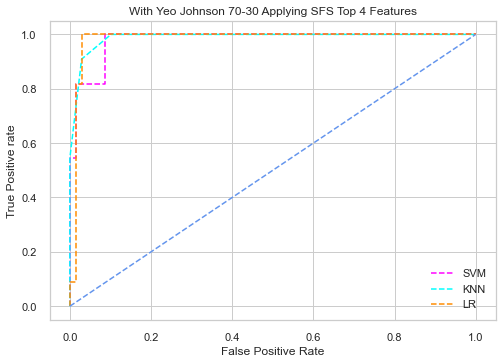

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('With Yeo Johnson 70-30 Applying SFS Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC With YJ/With Yeo Johnson 70-30 Applying SFS Top 4 Features.png", dpi=300)

plt.show();